## Question 1: Regression Analysis & Data Preprocessing – Business and Housing Use Cases

### Scenario

You are working as a data analyst for a **real estate team** that wants to predict house prices using multiple factors.

You must clean, preprocess, analyze, and model the data appropriately.

### Datasets

* **House Prices Dataset (Multiple Linear Regression – Kaggle)**
  [https://www.kaggle.com/datasets/camnugent/california-housing-prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### Tasks

1. Perform **EDA** on both datasets.
2. Apply required **data preprocessing** steps:

   * Handling missing values
   * Feature encoding (if applicable)
   * Feature scaling
4. Build a **Multiple Linear Regression** model for the housing dataset.
5. Interpret regression coefficients in real-world terms.
6. Evaluate model using **R²**, **MSE**, and residual analysis.
7. State and verify assumptions of linear regression.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score
)


In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [3]:
data.shape


(1470, 35)

In [4]:
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data["Attrition"] = (
    data["Attrition"]
    .astype(str)
    .str.strip()
    .map({"Yes": 1, "No": 0})
)


In [8]:
assert data["Attrition"].isna().sum() == 0
data["Attrition"].value_counts()


Attrition
0    1233
1     237
Name: count, dtype: int64

In [9]:
X = data.drop("Attrition", axis=1)
y = data["Attrition"]


In [10]:
X = X.drop(
    ["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"],
    axis=1
)


In [11]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns


In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)
    ]
)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [15]:
baseline_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


In [16]:
baseline_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [17]:
y_pred_base = baseline_model.predict(X_test)
y_prob_base = baseline_model.predict_proba(X_test)[:, 1]


In [18]:
accuracy_score(y_test, y_pred_base)


0.8639455782312925

In [19]:
print(classification_report(y_test, y_pred_base))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



In [20]:
roc_auc_score(y_test, y_prob_base)


0.8102334395727453

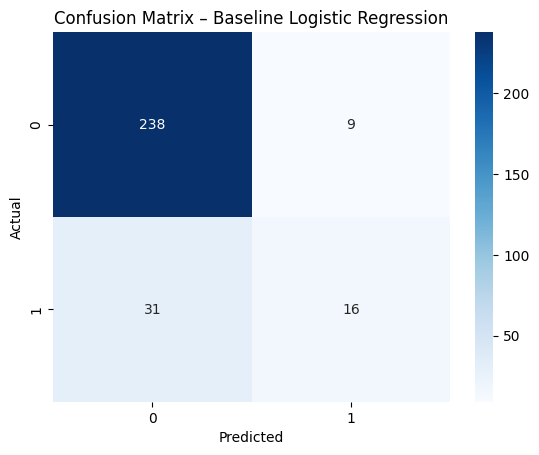

In [21]:
cm = confusion_matrix(y_test, y_pred_base)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Baseline Logistic Regression")
plt.show()


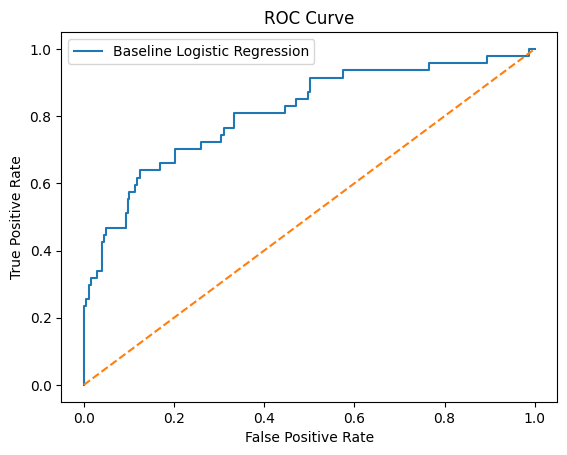

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_prob_base)

plt.plot(fpr, tpr, label="Baseline Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Question 2: Classification & Logistic Regression – Employee Attrition or Credit Risk

### Scenario

You are hired by an organization to build a system that predicts a **binary outcome**:

* Whether an **employee will leave** the company, OR
* Whether a **customer will default** on a credit card payment.

### Datasets (Choose ONE)

* **IBM HR Analytics Employee Attrition Dataset**
  [https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

* **Credit Card Default Dataset**
  [https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

### Tasks

1. Justify why **Logistic Regression** is suitable for this problem.
2. Perform full **data preprocessing**:

   * Missing value handling
   * Encoding categorical variables
   * Feature scaling
3. Train a **Logistic Regression** classifier.
4. Evaluate the model using:

   * Confusion Matrix
   * Precision, Recall, F1-score
   * AUC Score
5. Interpret model coefficients using **odds ratios**.
6. Discuss the impact of **class imbalance** and possible solutions.

In [23]:
from sklearn.model_selection import GridSearchCV


In [24]:
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear"]
}


In [25]:
grid_search = GridSearchCV(
    estimator=baseline_model,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)


In [26]:
grid_search.fit(X_train, y_train)


C:\Users\Suresh\Desktop\DSML\Projects\DS-P1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Suresh\Desktop\DSML\Projects\DS-P1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=1000))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidat

In [27]:
grid_search.best_params_


{'classifier__C': 1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [28]:
best_grid_model = grid_search.best_estimator_


In [29]:
y_prob_grid = best_grid_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob_grid)


0.806184856576794

In [30]:
from sklearn.model_selection import RandomizedSearchCV


In [31]:
param_dist = {
    "classifier__C": np.logspace(-3, 2, 20),
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear"]
}


In [32]:
random_search = RandomizedSearchCV(
    estimator=baseline_model,
    param_distributions=param_dist,
    n_iter=15,
    scoring="roc_auc",
    cv=5,
    random_state=42,
    n_jobs=-1
)


In [33]:
random_search.fit(X_train, y_train)


C:\Users\Suresh\Desktop\DSML\Projects\DS-P1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=1000))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'classifier__C': array([1.0000...00000000e+02]), 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear']}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",15
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versi

In [34]:
random_search.best_params_


{'classifier__solver': 'liblinear',
 'classifier__penalty': 'l2',
 'classifier__C': np.float64(100.0)}

In [35]:
best_random_model = random_search.best_estimator_


In [36]:
y_prob_random = best_random_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob_random)


0.8064432767680249

In [37]:
comparison = pd.DataFrame({
    "Model": ["Baseline", "GridSearchCV", "RandomizedSearchCV"],
    "ROC_AUC": [
        roc_auc_score(y_test, y_prob_base),
        roc_auc_score(y_test, y_prob_grid),
        roc_auc_score(y_test, y_prob_random)
    ]
})

comparison


,Model,ROC_AUC
0,Baseline,0.810233
1,GridSearchCV,0.806185
2,RandomizedSearchCV,0.806443


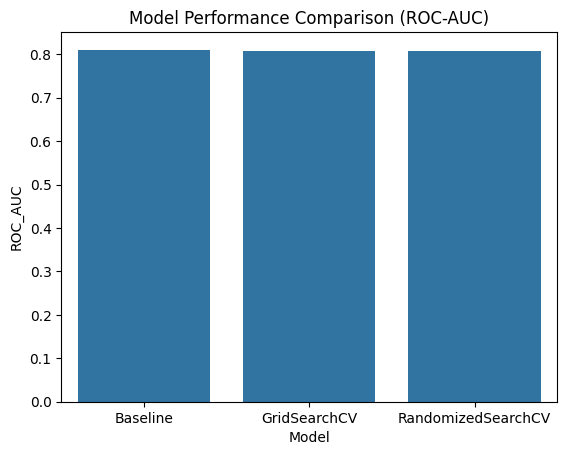

In [38]:
sns.barplot(x="Model", y="ROC_AUC", data=comparison)
plt.title("Model Performance Comparison (ROC-AUC)")
plt.show()


In [39]:
coefficients = best_grid_model.named_steps["classifier"].coef_[0]
feature_names = best_grid_model.named_steps["preprocessing"].get_feature_names_out()


In [40]:
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})


In [41]:
coef_df["Odds_Ratio"] = np.exp(coef_df["Coefficient"])
coef_df.sort_values(by="Odds_Ratio", ascending=False).head(15)


,Feature,Coefficient,Odds_Ratio
43,cat__OverTime_Yes,1.775907,5.905634
23,cat__BusinessTravel_Travel_Frequently,1.437409,4.209773
34,cat__JobRole_Laboratory Technician,1.247795,3.482656
40,cat__JobRole_Sales Representative,0.714659,2.043489
42,cat__MaritalStatus_Single,0.603589,1.828671
24,cat__BusinessTravel_Travel_Rarely,0.544996,1.724602
21,num__YearsSinceLastPromotion,0.512760,1.669895
11,num__NumCompaniesWorked,0.452321,1.571957
2,num__DistanceFromHome,0.359038,1.431951
32,cat__Gender_Male,0.246929,1.280089


## Question 3: Hyperparameter Tuning & Model Optimization

### Scenario

After deploying your classification model, stakeholders ask you to **improve performance** without changing the dataset.

You decide to optimize the model using systematic hyperparameter search techniques.

### Dataset

Reuse the dataset from **Question 2**.

### Tasks

1. Explain the difference between **parameters** and **hyperparameters**.
2. Train a **baseline Logistic Regression** model.
3. Apply **GridSearchCV** to tune hyperparameters (`C`, `penalty`, `solver`).
4. Apply **RandomizedSearchCV** and compare results.
5. Compare performance before and after tuning.
6. Discuss trade-offs between **computational cost** and **model performance**.

In [42]:
from sklearn.metrics import precision_recall_curve


In [43]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_grid)


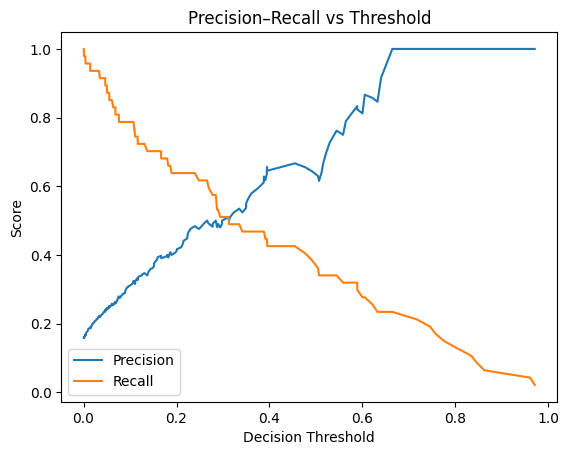

In [44]:
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision–Recall vs Threshold")
plt.legend()
plt.show()


In [45]:
import joblib
joblib.dump(best_grid_model, "assignment08_logistic_model.pkl")


['assignment08_logistic_model.pkl']